# Lesson 04 - Designing Neural Networks

### The following topics are discussed in this notebook:
* How design options such as number of layers, layer sizes, activation functions, and others effect model performance.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ClassificationPlotter import plot_regions

import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import set_random_seed

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


## Write Function for Visualizing Training Progress

In [2]:
def vis_training(h):
    plt.figure(figsize=(8,4))
    
    plt.subplot(1,2,1)
    plt.plot(h.history['loss'], label='Training')
    plt.plot(h.history['val_loss'], label='Validation')
    plt.title('Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(h.history['acc'], label='Training')
    plt.plot(h.history['val_acc'], label='Validation')
    plt.title('Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    
    plt.show()

## Example 1

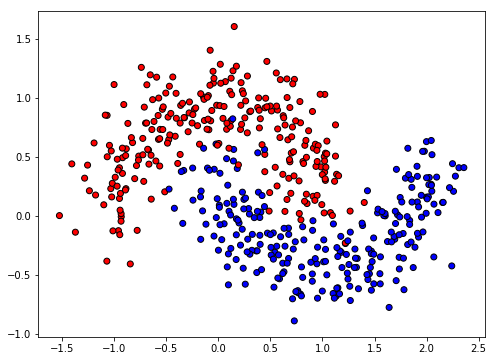

In [3]:
from sklearn.datasets import make_moons

np.random.seed(1)
plt.figure(figsize=(8,6))
X1, y1 = make_moons(500, noise=0.2)
plt.scatter(X1[:,0], X1[:,1], c=y1, cmap='bwr_r', edgecolor='k')
plt.show()

In [4]:
X1_train, X1_val, y1_train, y1_val = train_test_split(X1, y1, test_size=0.2, random_state=1)
print(X1_train.shape)
print(X1_val.shape)
print(y1_train.shape)
print(y1_val.shape)

(400, 2)
(100, 2)
(400,)
(100,)


In [5]:
np.random.seed(1)
set_random_seed(1)

model_1 = Sequential()
model_1.add(Dense(4, input_shape=(2,), activation='relu'))
model_1.add(Dense(4, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))

opt = keras.optimizers.Adam(lr=0.1)
model_1.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

h = model_1.fit(X1_train, y1_train, batch_size=400, epochs=100, verbose=0, validation_data=(X1_val, y1_val))

tra_score = model_1.evaluate(X1_train, y1_train, verbose=0)
val_score = model_1.evaluate(X1_val, y1_val, verbose=0)

print('Training Scores:  ', tra_score)
print('Validation Scores:', val_score)

Training Scores:   [0.08252627223730087, 0.965]
Validation Scores: [0.11821264302358031, 0.97]


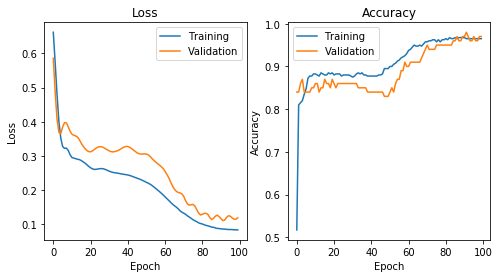

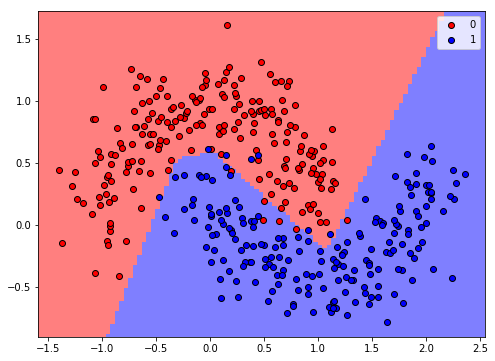

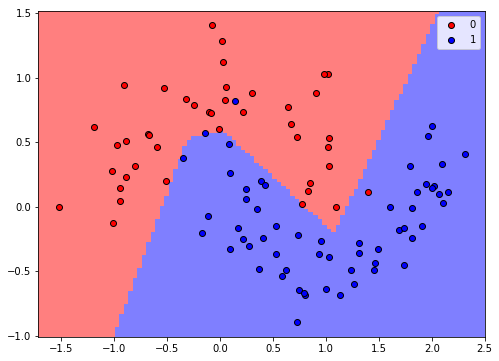

In [6]:
vis_training(h)
plot_regions(model_1, X1_train, y1_train, cmap='bwr_r', fig_size=(8,6), keras=True)
plot_regions(model_1, X1_val, y1_val, cmap='bwr_r', fig_size=(8,6), keras=True)

## Example 2

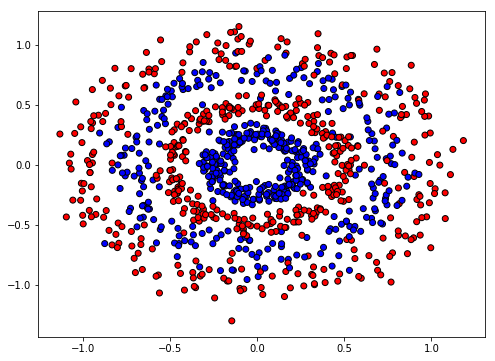

In [7]:
from sklearn.datasets import make_circles

np.random.seed(1)
plt.figure(figsize=(8,6))
X2a, y2a = make_circles(500, factor=0.75, noise=0.1)
X2b, y2b = make_circles(500, factor=0.5, noise=0.1) 
X2b = X2b * 0.5

plt.scatter(X2a[:,0], X2a[:,1], c=y2a, cmap='bwr_r', edgecolor='k')
plt.scatter(X2b[:,0], X2b[:,1], c=y2b, cmap='bwr_r', edgecolor='k')
plt.show()

In [8]:
X2 = np.vstack((X2a, X2b))
y2 = np.hstack((y2a, y2b))

print(X2.shape)
print(y2.shape)

(1000, 2)
(1000,)


In [9]:
X2_train, X2_val, y2_train, y2_val = train_test_split(X2, y2, test_size=0.2, random_state=1)
print(X2_train.shape)
print(X2_val.shape)
print(y2_train.shape)
print(y2_val.shape)

(800, 2)
(200, 2)
(800,)
(200,)


In [10]:
import random as rn

In [11]:
np.random.seed(1)
set_random_seed(1)

model_2 = Sequential()
model_2.add(Dense(32, input_shape=(2,), activation='relu'))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))

opt = keras.optimizers.Adam(lr=0.01)
model_2.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

h = model_2.fit(X2_train, y2_train, batch_size=800, epochs=1000, verbose=0, validation_data=(X2_val, y2_val))

tra_score = model_2.evaluate(X2_train, y2_train, verbose=0)
val_score = model_2.evaluate(X2_val, y2_val, verbose=0)

print('Training Scores:  ', tra_score)
print('Validation Scores:', val_score)

Training Scores:   [0.13000075578689574, 0.93875]
Validation Scores: [0.3848338857293129, 0.88]


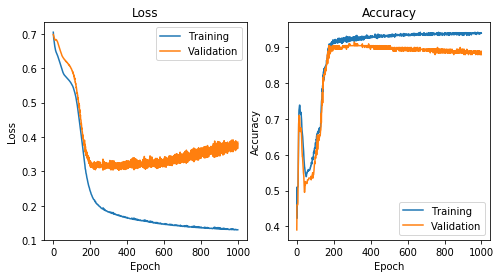

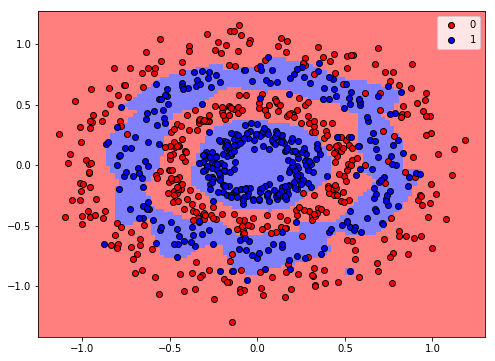

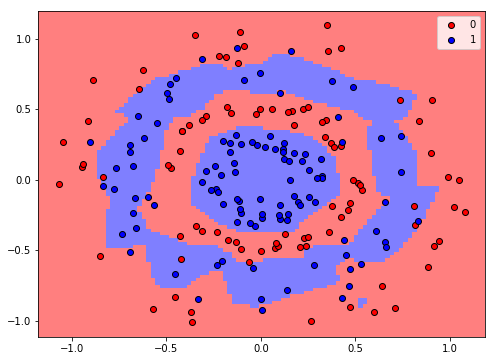

In [12]:
vis_training(h)
plot_regions(model_2, X2_train, y2_train, cmap='bwr_r', fig_size=(8,6), keras=True)
plot_regions(model_2, X2_val, y2_val, cmap='bwr_r', fig_size=(8,6), keras=True)

## Example 3

In [13]:
from sklearn.datasets import make_blobs

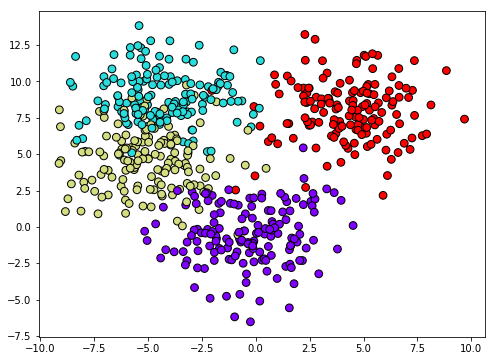

In [14]:
np.random.seed(765)

X3, y3 = make_blobs(n_samples = 600, centers=4, cluster_std=2)

plt.figure(figsize=(8,6))
plt.scatter(X3[:,0], X3[:,1], c=y3, edgecolor='k', s=60, cmap='rainbow')
plt.show()

In [15]:
X3_train, X3_val, y3_train, y3_val = train_test_split(X3, y3, test_size=0.2, random_state=1)

print(X3_train.shape)
print(y3_train.shape)

print(X3_val.shape)
print(y3_val.shape)

(480, 2)
(480,)
(120, 2)
(120,)


In [16]:
np.random.seed(1)
set_random_seed(1)

model_3 = Sequential()
model_3.add(Dense(16, input_shape=(2,), activation='relu'))
model_3.add(Dense(16, activation='relu'))
model_3.add(Dense(4, activation='softmax'))

opt = keras.optimizers.Adam(lr=0.01)
model_3.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

h = model_3.fit(X3_train, y3_train, batch_size=1024, epochs=1000, verbose=0, validation_data=(X3_val, y3_val))

tra_score = model_3.evaluate(X3_train, y3_train, verbose=0)
val_score = model_3.evaluate(X3_val, y3_val, verbose=0)

print('Training Scores:  ', tra_score)
print('Validation Scores:', val_score)

Training Scores:   [0.16330505361159642, 0.93125]
Validation Scores: [0.5648408730824789, 0.8916666626930236]


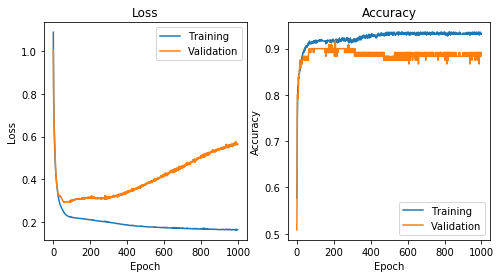

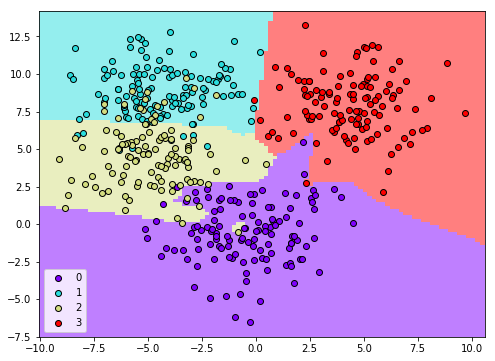

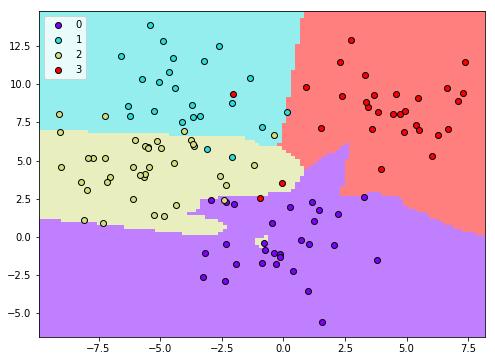

In [17]:
vis_training(h)

plot_regions(model_3, X3_train, y3_train, cmap='rainbow', fig_size=(8,6), keras=True)
plot_regions(model_3, X3_val, y3_val, cmap='rainbow', fig_size=(8,6), keras=True)